In this notebook we will analyze the file with the polygons of the city of Newyork, to determine if it is useful for the analysis or it is necessary to look for a more complete one.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

## With the data received in DS4A

In [3]:
geographic = pd.read_csv("Data/geographic.csv")

In [4]:
# Organiza los datos de la tabla "geographic", agrupando las coordenadas de cada zona NTA
ntas_coord = {}
for nta in geographic:
    ntas_coord[nta] = [[],[]]
    temp = list(geographic[nta])
    for i in range(len(temp)):
        if pd.isna(temp[i]):
            break
        elif i % 2 == 0:
            ntas_coord[nta][0].append(temp[i])
        else:
            ntas_coord[nta][1].append(temp[i])
            
nta_polygon = {}
for code in ntas_coord: #for para recorrer las llaves del diccionario
        lons_lats_vect = np.column_stack((ntas_coord[code][0], ntas_coord[code][1])) # Reshape coordinates
        nta_polygon[code] = Polygon(lons_lats_vect) # create polygon

In [5]:
# Convierte el diccionario de coordenadas organizadas, a un GeoSeries. GeoSeries es una
# estructura de la librería GeoPandas
polys = gpd.GeoSeries(nta_polygon)

In [12]:
# Convierte la geoserie a geodataframe
polys_gdf = GeoDataFrame(polys, columns =["geometry"])
print(polys_gdf.shape)
polys_gdf.head()

(195, 1)


,geometry
BK88,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
QN52,"POLYGON ((-73.79493 40.75781, -73.79475 40.755..."
QN48,"POLYGON ((-73.77574 40.74333, -73.77580 40.743..."
QN51,"POLYGON ((-73.80379 40.77562, -73.80099 40.775..."
QN27,"POLYGON ((-73.86110 40.76367, -73.85993 40.762..."


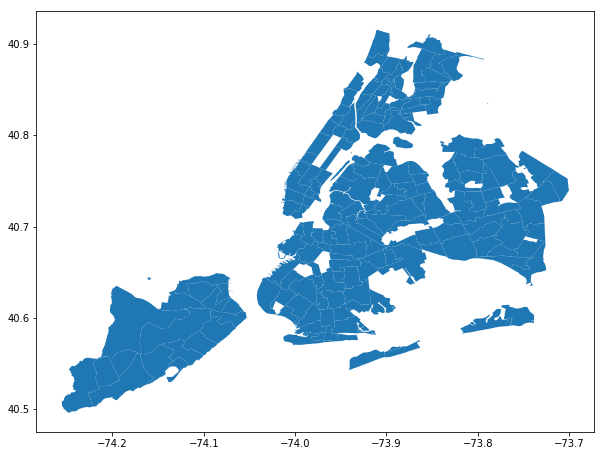

In [8]:
# Gráfica de las zonas NTA de acuerdo a la data recibida en DS4A
polys_gdf.plot(figsize=(10,8))
plt.show()

In the graph above you can see some "holes" on the map. These holes coincide with green areas of the city. However, some coordinates of the uber pickup locations are within these zones. This means that these coordinates would not be grouped in any zone.

## With downloaded data

Descargados de la página: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq

In [11]:
# La información se descarga en formato geojson. Esto facilita cargarlos 
# con la librería GeoPandas. Se carga como un GeoDataFrame.
nta_downloaded = gpd.read_file("Data/Neighborhood Tabulation Areas.geojson")
print(nta_downloaded.shape)
nta_downloaded.head()

(195, 8)


,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,BK88,54005018.7472,047,Borough Park,39247.2280737,Brooklyn,3,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ..."
1,QN51,52488276.477,081,Murray Hill,33266.904811,Queens,4,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ..."
2,QN27,19726845.26,081,East Elmhurst,19816.7115378,Queens,4,"MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ..."
3,QN07,22887772.7683,081,Hollis,20976.3358374,Queens,4,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ..."
4,MN06,10647077.6122,061,Manhattanville,17040.6865482,Manhattan,1,"MULTIPOLYGON (((-73.94608 40.82126, -73.94640 ..."


In [27]:
nta_downloaded.columns = ["nta_code","shape_area","county_fips","ntaname","shape_leng","boro_name","boro_code","geometry"]
print(nta_downloaded.shape)
nta_downloaded.head()

(195, 8)


,nta_code,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,BK88,54005018.7472,047,Borough Park,39247.2280737,Brooklyn,3,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ..."
1,QN51,52488276.477,081,Murray Hill,33266.904811,Queens,4,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ..."
2,QN27,19726845.26,081,East Elmhurst,19816.7115378,Queens,4,"MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ..."
3,QN07,22887772.7683,081,Hollis,20976.3358374,Queens,4,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ..."
4,MN06,10647077.6122,061,Manhattanville,17040.6865482,Manhattan,1,"MULTIPOLYGON (((-73.94608 40.82126, -73.94640 ..."


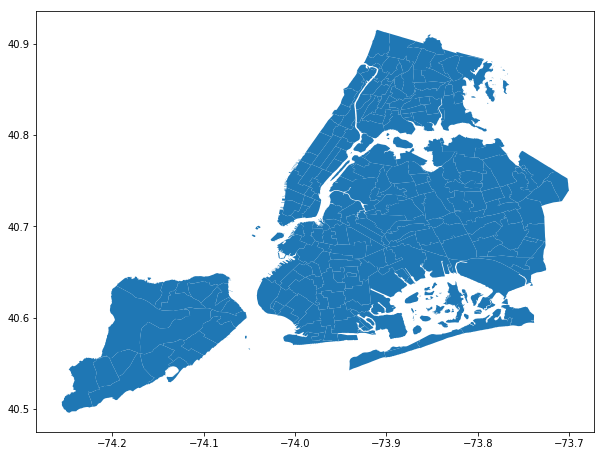

In [10]:
# Gráficas de los NTA de acuerdo a archivo descargado.
nta_downloaded.geometry.plot(figsize=(10,8))
plt.show()

In [16]:
zones = pd.read_csv('Data/zones.csv')
print(zones.shape)
zones.head()

(263, 5)


,location_id,borough,zone,service_zone,nta_code
0,1,EWR,Newark Airport,EWR,NJ01
1,2,Queens,Jamaica Bay,Boro Zone,QN61
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31
3,4,Manhattan,Alphabet City,Yellow Zone,MN22
4,5,Staten Island,Arden Heights,Boro Zone,SI48


In [34]:
comparation = pd.merge(zones[["location_id","zone","nta_code"]],nta_downloaded[["nta_code","ntaname"]],how="outer", on="nta_code",suffixes=("_zone","_geo"))
comparation.to_excel('-//comparation.xlsx')

In [35]:
comparation.head()

,location_id,zone,nta_code,ntaname
0,1.0,Newark Airport,NJ01,NaN
1,2.0,Jamaica Bay,QN61,Jamaica
2,130.0,Jamaica,QN61,Jamaica
3,3.0,Allerton/Pelham Gardens,BX31,Allerton-Pelham Gardens
4,4.0,Alphabet City,MN22,East Village


In [32]:
print(comparation.shape)
print(comparation.isnull().sum())
comparation
nta_downloaded

(268, 4)
location_id    5
zone           5
nta_code       0
ntaname        1
dtype: int64


,nta_code,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,BK88,54005018.7472,047,Borough Park,39247.2280737,Brooklyn,3,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ..."
1,QN51,52488276.477,081,Murray Hill,33266.904811,Queens,4,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ..."
2,QN27,19726845.26,081,East Elmhurst,19816.7115378,Queens,4,"MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ..."
3,QN07,22887772.7683,081,Hollis,20976.3358374,Queens,4,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ..."
4,MN06,10647077.6122,061,Manhattanville,17040.6865482,Manhattan,1,"MULTIPOLYGON (((-73.94608 40.82126, -73.94640 ..."
5,QN02,28428437.1473,081,Springfield Gardens North,25433.5828078,Queens,4,"MULTIPOLYGON (((-73.76031 40.67511, -73.75880 ..."
6,BK25,29991967.4117,047,Homecrest,27514.0237122,Brooklyn,3,"MULTIPOLYGON (((-73.95859 40.61040, -73.95828 ..."
7,BK95,14522603.5589,047,Erasmus,18756.7020088,Brooklyn,3,"MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ..."
8,BX33,10732451.8186,005,Longwood,18982.1290565,Bronx,2,"MULTIPOLYGON (((-73.89484 40.82625, -73.89487 ..."
9,SI12,89023936.4431,085,Mariner's Harbor-Arlington-Port Ivory-Granitev...,70983.8498241,Staten Island,5,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ..."


In [36]:
zones[zones["nta_code"]=="BK09"]

,location_id,borough,zone,service_zone,nta_code
32,33,Brooklyn,Brooklyn Heights,Boro Zone,BK09
51,52,Brooklyn,Cobble Hill,Boro Zone,BK09


We have evidenced that the data initially assigned does not contain the total of the polygons or the areas of the city of New York, while the downloaded works very well since it is complete, so we will use this for our treatments and analysis.